In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

# --------------------------------------------

output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\17. Fixing_Pictures\1. Fig_7"

# Construir las rutas de los archivos basadas en output_dir
particle_data_file = os.path.join(output_dir, "Particle_Data.csv")
system_data_file = os.path.join(output_dir, "System_Data.csv")

Partic_DF = pd.read_csv(particle_data_file)
System_DF = pd.read_csv(system_data_file)

# --------------------------------------------

simulation_data_file = os.path.join(output_dir, "Simulation_Values.csv")

Simulation_Values = pd.read_csv(simulation_data_file)

Q_p = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'Q_p', 'Valor'].iloc[0])
Q_n = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'Q_n', 'Valor'].iloc[0])
m = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'm', 'Valor'].iloc[0])
N = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'N', 'Valor'].iloc[0])
kB = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'kB', 'Valor'].iloc[0])
Temp_Target = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'Temp_Target', 'Valor'].iloc[0])
e0 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'e0', 'Valor'].iloc[0])
R = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'R', 'Valor'].iloc[0])


r_2 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_2', 'Valor'].iloc[0])
r_1 = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_1', 'Valor'].iloc[0])
r_G = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'r_G', 'Valor'].iloc[0])
Mass = float(Simulation_Values.loc[Simulation_Values['Variable'] == 'm', 'Valor'].iloc[0])
IDEAL = bool(Simulation_Values.loc[Simulation_Values['Variable'] == 'IDEAL', 'Valor'].iloc[0])

Save_Step = int(Simulation_Values.loc[Simulation_Values['Variable'] == 'Saving_Steps', 'Valor'].iloc[0])

Step_int = 0
Step_max = 400

Lim_Inf = Save_Step * Step_int
Lim_Sup = Save_Step * Step_max

Step_Scale = (Step_max-Step_int)+1


In [2]:
Partic_DF = Partic_DF[(Partic_DF['Step'] >= Lim_Inf) & (Partic_DF['Step'] <= Lim_Sup)]
System_DF = System_DF[(System_DF['Step'] >= Lim_Inf) & (System_DF['Step'] <= Lim_Sup)]

In [3]:
def obtener_columnas_object(dataframe):
    columnas_object = []
    tipos_datos = dataframe.dtypes
    for columna, tipo in tipos_datos.items():
        if tipo == 'object':
            columnas_object.append(columna)
    return columnas_object

# -------- Conversión de data types y alistamiento de dataframes originales --------

columns_to_convert = obtener_columnas_object(System_DF)
# print(columns_to_convert)
System_DF[columns_to_convert] = System_DF[columns_to_convert].replace(',', '.', regex=True)
System_DF[columns_to_convert] = System_DF[columns_to_convert].astype(float)
# print(System_DF.dtypes)

columns_to_convert = obtener_columnas_object(Partic_DF)
# print(columns_to_convert)
Partic_DF[columns_to_convert] = Partic_DF[columns_to_convert].replace(',', '.', regex=True)
Partic_DF[columns_to_convert] = Partic_DF[columns_to_convert].astype(float)
# print(Partic_DF.dtypes)

del columns_to_convert

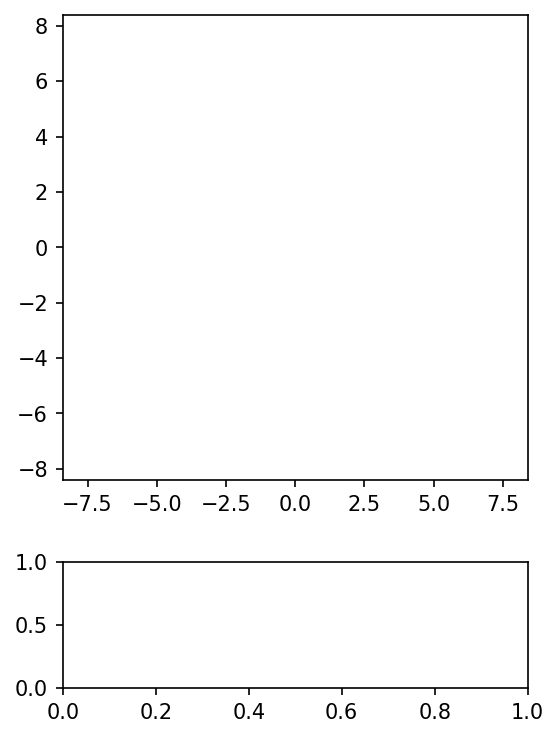

In [4]:
from matplotlib import pyplot as plt
import matplotlib.animation

def plotFrontiers( show ) :
    figA, axFrontier = plt.subplots(dpi=141)
    axFrontier.set_aspect(1)
    axFrontier.set_xlim(-r_2-(0.05*r_2),r_2+(0.05*r_2))
    axFrontier.set_ylim(-r_2-(0.05*r_2),r_2+(0.05*r_2))
                
    plt.gca().set_aspect('equal') #Aspect ratio

    circle1 = plt.Circle((0,0), r_1, color='r')
    circle2 = plt.Circle((0,0), r_2, color='b')
    circleG = plt.Circle((0,0), r_G, color='r')
    
    pc = matplotlib.collections.PatchCollection([circle1,circle2,circleG],facecolor='none', edgecolor='b')
    
    axFrontier.add_collection(pc)    

    plt.xlabel("x")
    plt.ylabel("y")        
    if show : 
        plt.show()
  
def computeSize():
  figA, ax = plt.subplots(2,figsize=(4, 6),gridspec_kw={'height_ratios': [0.8, 0.2]},dpi=150)
  ax[0].set_aspect(1)
  ax[0].set_xlim(-r_2-(0.05*r_2),r_2+(0.05*r_2))
  ax[0].set_ylim(-r_2-(0.05*r_2),r_2+(0.05*r_2))
  particleSize = ((2*R*ax[0].get_window_extent().width  / (2*(4/np.pi)*(r_2+(0.1*r_2))) * 72./figA.dpi) ** 2)
  return particleSize

particleSize = computeSize()

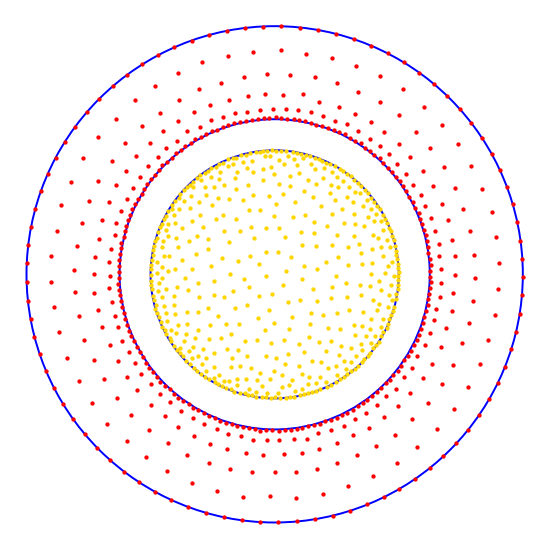

In [5]:
def plotParticles(show) : 
    global X, Y

    XList = X.tolist()
    YList = Y.tolist()

    Xr1_List = XList[0 : int(N/2)]
    Yr1_List = YList[0 : int(N/2)]

    Xr2_List = XList[int(N/2) : int(N)]
    Yr2_List = YList[int(N/2) : int(N)] 

    plt.scatter(Xr2_List, Yr2_List, c ="red",
            linewidths = 1,
            marker ="o",
            edgecolor ="red",
            s = particleSize)
    
    plt.scatter(Xr1_List, Yr1_List, c ="#FFD700",
            linewidths = 1,
            marker ="o",
            edgecolor ="#FFD700",
            s = particleSize)

Temp_DF = Partic_DF[Partic_DF['Step'] == max(Partic_DF['Step'])]

X = Temp_DF['X_Pos']
Y = Temp_DF['Y_Pos']

plotFrontiers(False)
plotParticles(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.axis('off')
output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\17. Fixing_Pictures\1. Fig_7\2. Fig Fixed"

plt.savefig(os.path.join(output_dir, "Final_Config.pdf"), dpi=1000)
plt.savefig(os.path.join(output_dir, "Final_Config.png"), dpi=1000)

In [6]:
from numpy import linalg as LA

# Calcula la suma de 'Ke_Energy' para cada valor único en 'Step'
grouped_sum = Partic_DF.groupby('Step')['Ke_Energy'].sum()

# Asigna la suma correspondiente a cada fila en 'Calo_Cap'
Partic_DF['Ke_Total'] = Partic_DF['Step'].map(grouped_sum)

Partic_DF['Ke_Mean'] = Partic_DF['Vel_M']**2
Partic_DF['Ke_Mean'] = Partic_DF.groupby('Step')['Ke_Mean'].transform('mean')
Partic_DF['Ke_Mean'] = Partic_DF['Ke_Mean']*m*0.5


def magnitude(vector) : 
    return LA.norm(vector)

def q(n) : 
    if n < N/2: 
      return Q_p # n will start at zero
    else : 
      return Q_n

def Potencial_Energy(df):
    # N = len(df)  # Obtener el número de filas en el DataFrame
    rVector = df[['X_Pos', 'Y_Pos']].values  # Obtener los valores de las columnas 'x' y 'y' como una matriz numpy
    Conts = 1 / (4 * np.pi * e0)
    Sum_m = 0
    
    for m in range(0, N):
        Qm = q(m)
        Sum_n = 0
        
        for n in range(0, N):
            if m != n:
                Qn = q(n)
                Dist = magnitude(rVector[n] - rVector[m])
                Sum_n += Qn * Conts * (1 / Dist)
      
        Sum_m += Qm * Sum_n
    
    return Sum_m

def Potencial_Energy_2(df):
    N = len(df)
    rMatrix = df[['X_Pos', 'Y_Pos']].values
    
    Q = np.vectorize(q)(np.arange(N))  # Vectorized q(n) function
    Q_matrix = np.tile(Q, (N, 1))
    
    r_diff = rMatrix[:, np.newaxis, :] - rMatrix[np.newaxis, :, :]
    distances = LA.norm(r_diff, axis=-1)
    
    np.fill_diagonal(distances, 1.0)  # Avoid division by zero on the diagonal
    
    Conts = 1 / (4 * np.pi * e0)
    potential_matrix = Q_matrix * Q_matrix.T * Conts / distances
    np.fill_diagonal(potential_matrix, 0)
    
    potential_energy = np.sum(potential_matrix)
    
    return potential_energy

grouped = Partic_DF.groupby('Step')

for step, group in grouped:
    Pot_Energy = Potencial_Energy_2(group)
    Partic_DF.loc[group.index, 'Pot_Energy'] = Pot_Energy
    
    # Pot_Energy_2 = Potencial_Energy_2(group)
    # Partic_DF.loc[group.index, 'Pot_Energy_2'] = Pot_Energy_2
    
    print((step/System_DF['Step'].max())*100)


# Realizar la fusión (merge) de los DataFrames basándote en la columna 'Step'
Partic_DF = pd.merge(Partic_DF, System_DF[['Step', 'Temp_Tar']], on='Step', how='left')
Partic_DF = pd.merge(Partic_DF, System_DF[['Step', 'Temp_Act']], on='Step', how='left')

Partic_DF['Total_E'] = Partic_DF['Ke_Total'] + Partic_DF['Pot_Energy']
Partic_DF['Total_EE'] = Partic_DF['Total_E']**2

del grouped,step,group,grouped_sum,Pot_Energy


0.25
0.5
0.75
1.0
1.25
1.5
1.7500000000000002
2.0
2.25
2.5
2.75
3.0
3.25
3.5000000000000004
3.75
4.0
4.25
4.5
4.75
5.0
5.25
5.5
5.75
6.0
6.25
6.5
6.75
7.000000000000001
7.249999999999999
7.5
7.75
8.0
8.25
8.5
8.75
9.0
9.25
9.5
9.75
10.0
10.25
10.5
10.75
11.0
11.25
11.5
11.75
12.0
12.25
12.5
12.75
13.0
13.25
13.5
13.750000000000002
14.000000000000002
14.249999999999998
14.499999999999998
14.75
15.0
15.25
15.5
15.75
16.0
16.25
16.5
16.75
17.0
17.25
17.5
17.75
18.0
18.25
18.5
18.75
19.0
19.25
19.5
19.75
20.0
20.25
20.5
20.75
21.0
21.25
21.5
21.75
22.0
22.25
22.5
22.75
23.0
23.25
23.5
23.75
24.0
24.25
24.5
24.75
25.0
25.25
25.5
25.75
26.0
26.25
26.5
26.75
27.0
27.250000000000004
27.500000000000004
27.750000000000004
28.000000000000004
28.249999999999996
28.499999999999996
28.749999999999996
28.999999999999996
29.25
29.5
29.75
30.0
30.25
30.5
30.75
31.0
31.25
31.5
31.75
32.0
32.25
32.5
32.75
33.0
33.25
33.5
33.75
34.0
34.25
34.5
34.75
35.0
35.25
35.5
35.75
36.0
36.25
36.5
36.75
37.0
37.25
3

In [7]:
Partic_DF["Pos_Ratio"] = np.sqrt((Partic_DF['X_Pos']**2) + (Partic_DF['Y_Pos']**2))

7.9999992976976655


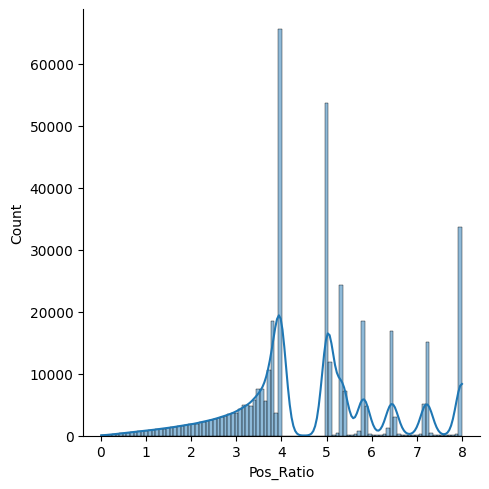

In [8]:
# ------------------ Distribución de todas las partículas ------------------

Total_Density = Partic_DF.copy()

Muestras = 100  # Número de muestras

sns.displot(Total_Density, x="Pos_Ratio",bins=Muestras, kde=True)
print(Total_Density["Pos_Ratio"].max())
plt.show()

del Muestras

In [9]:
Total_Density = Partic_DF.copy()

Muestras = 50               # Número de muestras

# Calcular el tamaño de cada intervalo
interval_size_Int = r_1 / Muestras
interval_size_Ext = (r_2 - r_G) / Muestras

# Crear una lista de diccionarios para almacenar los resultados
resultados_Int = []
resultados_Ext = []

# Calcular el rango de valores para cada intervalo y almacenarlos en la lista de resultados
for i in range(Muestras):
    inicio = i * interval_size_Int
    fin = (i + 1) * interval_size_Int
    resultados_Int.append({'Intervalo': f'({inicio}, {fin})', 'Inicio': inicio, 'Fin': fin})

for i in range(Muestras):
    inicio = i * interval_size_Ext + r_G
    fin = (i + 1) * interval_size_Ext + r_G
    resultados_Ext.append({'Intervalo': f'({inicio}, {fin})', 'Inicio': inicio, 'Fin': fin})
    
    
# Crear el DataFrame a partir de la lista de resultados
Total_Density = pd.DataFrame(resultados_Int)

# Crear un DataFrame para los resultados externos
resultados_Ext_df = pd.DataFrame(resultados_Ext)

# Concatenar los DataFrames usando la función concat
Total_Density = pd.concat([Total_Density, resultados_Ext_df], ignore_index=True)

# Crear una lista para almacenar los contadores de densidad de carga
densidad_carga = [0] * (Muestras*2)  # Agregar uno para el resultado externo

# Iterar sobre cada valor en la columna Pos_Ratio de Particle_DF
for valor in Partic_DF['Pos_Ratio']:
    # Verificar en qué intervalo se encuentra el valor
    for i in range(Muestras):
        inicio_Int = i * interval_size_Int
        fin_Int = (i + 1) * interval_size_Int
        inicio_Ext = (i * interval_size_Ext) + r_G
        fin_Ext = ((i + 1) * interval_size_Ext) + r_G
        
        if inicio_Int <= valor < fin_Int:
            # Incrementar el contador correspondiente al intervalo
            densidad_carga[i] += 1
            break  # Romper el bucle una vez que se ha encontrado el intervalo
        elif inicio_Ext <= valor < fin_Ext:
            # Incrementar el contador correspondiente al intervalo
            densidad_carga[i+(Muestras)] += 1
            break  # Romper el bucle una vez que se ha encontrado el intervalo
        
# Crear una columna "Densidad_Carga" en el DataFrame df_resultados
Total_Density['Count'] = densidad_carga


# Crear la columna "Q" en el DataFrame Total_Density
Total_Density['Q'] = Q_p

# Aplicar la condición para ajustar los valores de la columna "Q"
Total_Density.loc[Total_Density['Fin'] > r_1, 'Q'] = Q_n

print("La suma de Partículas es igual a ",Total_Density["Count"].sum())


del interval_size_Int,interval_size_Ext,resultados_Int,resultados_Ext,i,inicio
del fin,densidad_carga,valor,inicio_Int,fin_Int,inicio_Ext,fin_Ext 

La suma de Partículas es igual a  400000


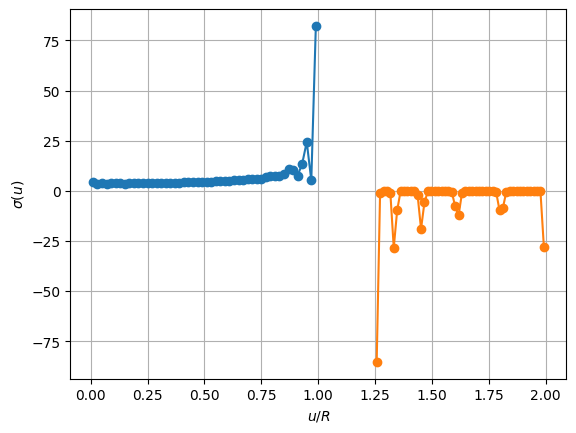

In [10]:
# SigmaTwoSheets=pd.read_csv(r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\92. SigmaTwoSheets.dat", sep='\t')

Total_Density['u/R'] = ((Total_Density['Fin']+Total_Density['Inicio'])/2)/r_1

# Crear la columna "Q" en el DataFrame Total_Density
Total_Density['Q'] = Q_p

# Aplicar la condición para ajustar los valores de la columna "Q"
Total_Density.loc[Total_Density['Fin'] > r_1, 'Q'] = Q_n

Total_Density['Sigma'] = (Total_Density['Count'] * Total_Density['Q']) / (np.pi * ((Total_Density['Fin']**2)-(Total_Density['Inicio']**2)))
Total_Density['Sigma'] = Total_Density['Sigma'] / Step_Scale

Temp_DF = Total_Density[Total_Density['u/R'] <= 1]
plt.plot(Temp_DF["u/R"], Temp_DF["Sigma"], marker='o')
Temp_DF = Total_Density[Total_Density['u/R'] > 1]
plt.plot(Temp_DF["u/R"], Temp_DF["Sigma"], marker='o')
# plt.plot(SigmaTwoSheets["u/R"], SigmaTwoSheets["Sigma"], label="Sigma_MM", marker='o', linestyle='-')
plt.xlabel(r"$u/R$")  # Etiqueta del eje x
plt.ylabel(r"$\sigma (u)$")
# plt.title("Sigma_Dist_Two_Sheets")
# plt.legend()
plt.grid(True)

# # plt.axvline(x=  0, color='r', linestyle='--')
# plt.axvline(x=r_1/r_1, color='r', linestyle='--')
# plt.axvline(x=r_G/r_1, color='r', linestyle='--')
# # plt.axvline(x=r_2/r_1, color='r', linestyle='--')

# plt.fill_betweenx(y=[-80,80],x1=r_1/r_1,x2=r_G/r_1, color='gray', alpha=0.5, label='Ext_Disc')

# plt.show()
plt.savefig(os.path.join(output_dir, "Sigma_Dist_Comp_All.pdf"),dpi=1000)
plt.savefig(os.path.join(output_dir, "Sigma_Dist_Comp_All.png"),dpi=1000)

# del area_y1,area_y2,Factor_Esc

Añadir valor de carga integrada en r_G = 0

In [11]:
Temp = pd.DataFrame({'Intervalo':0,
 'Inicio': [0],
 'Fin': [0],
 'Count':[0],
 'Q':[0],
 'u/R':[r_G/r_1],
 'Sigma':[0],})

Total_Density = pd.concat([Total_Density.iloc[:Muestras], Temp, Total_Density.iloc[Muestras:]], ignore_index=True)

200000
200000


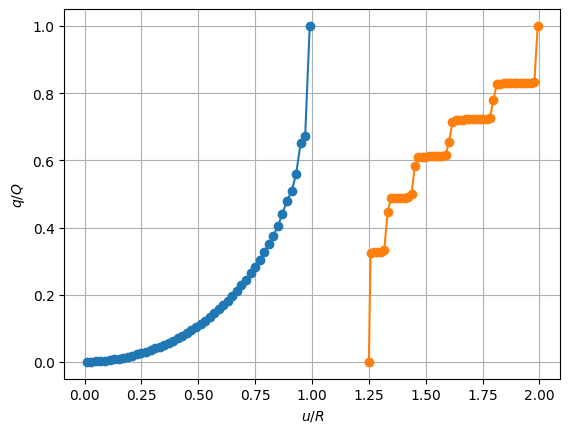

In [12]:
# TwoSheets_Data = pd.read_csv(r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\93. ChargeTwoSheets.dat", sep='\t')

# Crear una lista para almacenar las sumas acumuladas
q_comulate = []
acumulado = 0
encontrado_r1 = False

# Recorrer el DataFrame Total_Density y calcular las sumas acumuladas
for index, row in Total_Density.iterrows():
    if row['Fin'] == r_1:
        acumulado += row['Count']
        q_comulate.append(acumulado)
        encontrado_r1 = True
        acumulado = 0
    elif encontrado_r1:
        acumulado += row['Count']
        q_comulate.append(acumulado)
    else:
        acumulado += row['Count']
        q_comulate.append(acumulado)
        
# Agregar la lista como columna "q_Comulate" al DataFrame Total_Density
Total_Density['q_Comulate'] = q_comulate

# Encontrar la suma de los valores de "Count" donde "Fin" es menor a r_1 y asignarla a Val1
Val1 = Total_Density.loc[Total_Density['Fin'] <= r_1, 'Count'].sum()

# Encontrar la suma de los valores de "Count" donde "Fin" es mayor a r_1 y asignarla a Val2
Val2 = Total_Density.loc[Total_Density['Fin']  > r_1, 'Count'].sum()

print(Val1)
print(Val2)

Total_Density['q/Q'] = Total_Density['q_Comulate']

for index, row in Total_Density.iterrows():
    if row['Fin'] <= r_1:
        Total_Density.loc[index, 'q/Q'] /= Val1
    elif row['Fin'] > r_1:
        Total_Density.loc[index, 'q/Q'] /= Val2

Temp = Total_Density[Total_Density['u/R']<= r_1/r_1]
plt.plot(Temp["u/R"], Temp["q/Q"], marker='o', linestyle='-')

Temp = Total_Density[Total_Density['u/R'] > r_1/r_1]
plt.plot(Temp["u/R"], Temp["q/Q"], marker='o', linestyle='-')

# plt.plot(TwoSheets_Data["u/R"], TwoSheets_Data["q/Q"], label="MoM", marker='o', linestyle='-')
plt.xlabel(r"$u/R$")  # Etiqueta del eje x
plt.ylabel(r"$q/Q$")
# plt.title("Charge_Dist_Two_Sheets")
# plt.legend()
plt.grid(True)
# plt.show()
plt.savefig(os.path.join(output_dir, "Charge_Dist_Total.png"),dpi=1000)
plt.savefig(os.path.join(output_dir, "Charge_Dist_Total.pdf"),dpi=1000)

ruta_Total_Density = os.path.join(output_dir, "91. Sigma_&_Charge_MD.csv")
# Total_Density.to_csv(ruta_Total_Density, sep='\t', index=False)

Total_Density = Total_Density.drop(Muestras).reset_index(drop=True)

ruta_Total_Density = os.path.join(output_dir, "91. Sigma_&_Charge_MD.csv")
Total_Density.to_csv(ruta_Total_Density, sep='\t', index=False)

del q_comulate,acumulado,encontrado_r1,index,row,Val1,Val2

Z=0.04
Z=0.08
Z=2.0
Z=4.0
Z=8.0
Z=40.0


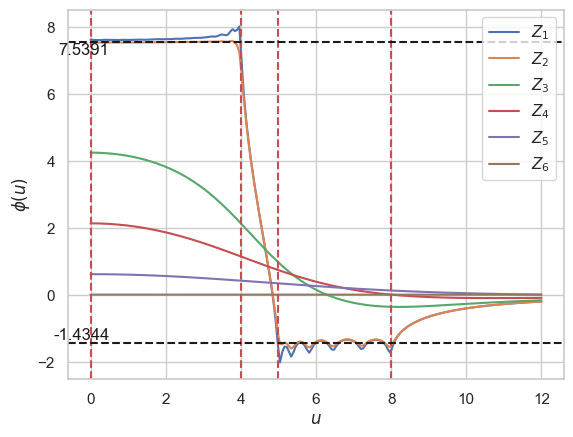

In [13]:
import scipy.special as sps

# Muestras = 50               # Número de muestras

# Calcular el tamaño de cada intervalo
interval_size_Int = r_1 / Muestras
interval_size_Ext = (r_2 - r_G) / Muestras

Total_Density['Center'] = (Total_Density['Inicio'] + Total_Density['Fin'])/2

def generar_numeros_equidistantes(N, inicio, fin):
    if N <= 1:
        return [inicio]

    paso = (fin - inicio) / (N - 1)  # Calcula el paso entre los números
    numeros = []

    for i in range(N):
        valor = inicio + i * paso
        numeros.append(valor)

    return numeros

def Delta_U(n):
    if n < Muestras:
        return interval_size_Int
    else:
        return interval_size_Ext

def Center_U(n):
    return Total_Density.loc[n, "Center"]

def Sigma_U(n):
    return Total_Density.loc[n, "Sigma"]

# Ejemplo de una función que calcula el potencial (debes definir la tuya)
def Potencial_Esp(valor_u, Z):
    
    Const = 1/(4*np.pi*e0)
    
    POTENCIAL = 0
    
    for i in range(2*Muestras):
        Density_u = Sigma_U(i)
        Center_u = Center_U(i)
        Delta_u = Delta_U(i)
        
        Dif_2 = (valor_u-Center_u)**2
        
        POTENCIAL += (Density_u * Center_u * Delta_u) * (4/(np.sqrt((Dif_2)+(Z**2)))) * sps.ellipk(-4*((valor_u*Center_u)/((Dif_2)+(Z**2))))
    
    return Const*POTENCIAL

U_Total = 201

Potencial_DF = pd.DataFrame({'U': generar_numeros_equidistantes(U_Total,0,1.5*r_2)})

# Lista de valores de Z que deseas graficar
valores_Z = [r_1/100,r_1/50,r_1/2,r_1,2*r_1,10*r_1]

# Crear un gráfico de dispersión para cada valor de Z
sns.set(style="whitegrid")  # Establece el estilo del gráfico



for i, Z in enumerate(valores_Z, start=1):
    # print(Z/max(valores_Z))
    columna_potencial = f'Potencial_{Z}'
    Potencial_DF[columna_potencial] = Potencial_DF['U'].apply(Potencial_Esp, Z=Z)
    # Potencial_DF[columna_potencial] = Potencial_DF[columna_potencial]/len(System_DF)
    sns.lineplot(data=Potencial_DF, x='U', y=columna_potencial, label=f'$Z_{i}$')
    print(f'Z={Z}')

# Personaliza el gráfico (títulos y etiquetas)
# plt.title('Gráfico de Potencial en función de U para diferentes valores de Z')
plt.xlabel(r'$u$')
plt.ylabel(r"$\phi (u)$")

# Agrega una leyenda
plt.legend(loc='upper right')

# Dibuja dos líneas verticales en el eje X
plt.axvline(x=  0, color='r', linestyle='--')
plt.axvline(x=r_1, color='r', linestyle='--')
plt.axvline(x=r_G, color='r', linestyle='--')
plt.axvline(x=r_2, color='r', linestyle='--')

# plt.axhline(y=-0.35, color='r', linestyle='--', label='Zona A')

# Rellena el área entre las líneas verticales
# plt.fill_betweenx([0, max(Potencial_DF['Potencial_0.1'])], r_G, r_2, color='gray', alpha=0.5, label='Ext_Disc')

Prom_G = Potencial_DF[(Potencial_DF['U'] > r_G) & (Potencial_DF['U'] < r_2)]['Potencial_0.08'].mean()
Prom_r1 = Potencial_DF[Potencial_DF['U'] < r_1]['Potencial_0.08'].mean()

plt.axhline(y=Prom_G, color='k', linestyle='--', label=f'Promedio_G={Prom_G:.4f}')
plt.axhline(y=Prom_r1, color='k', linestyle='--', label=f'Promedio_r1={Prom_r1:.4f}')

# Agrega etiquetas para los valores medios en la gráfica
plt.text(0.5, Prom_G, f'{Prom_G:.4f}', va='bottom', ha='right', color='k')
plt.text(0.5, Prom_r1, f'{Prom_r1:.4f}', va='top', ha='right', color='k')



# plt.show()
plt.savefig(os.path.join(output_dir, "Potencial.png"),dpi=1000)
plt.savefig(os.path.join(output_dir, "Potencial.pdf"),dpi=1000)

ruta_Potencial = os.path.join(output_dir, "92. Potencial_MD.csv")
Potencial_DF.to_csv(ruta_Potencial, sep='\t', index=False)

del Z,U_Total,valores_Z,columna_potencial,Prom_G ,Prom_r1,Muestras,interval_size_Int,interval_size_Ext

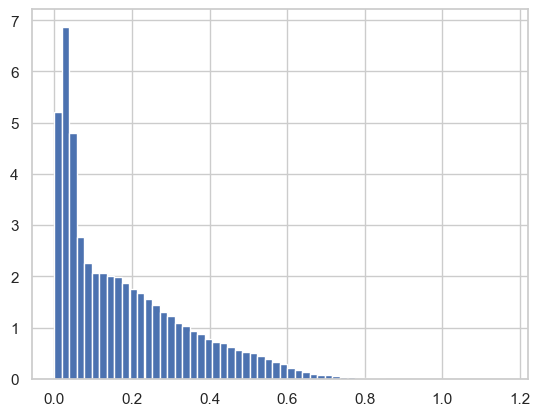

In [14]:
MD_Vel_Hist = plt.hist(Partic_DF['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)

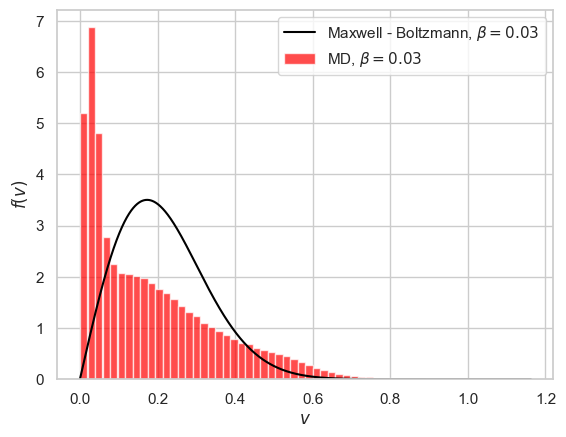

In [15]:
m = 1
kB = 1

def maxwell_f( v, Temp ) : 
  return (m*v/(kB*Temp))*np.exp(-m*(v**2)/(2*kB*Temp)) 

def maxwell_fPlot( nSteps, vf, Temp, Label) :
  vList = np.linspace(0, vf, nSteps)
  TEMP = maxwell_f(vList, Temp)
#   plt.scatter(vList, maxwell_f(vList, Temp) )
  # plt.plot(vList, TEMP,label = Label,gapcolor='b')
#   plt.show()
  return [vList,TEMP]

plt.xlabel(r'$v$')
plt.ylabel(r'$f (v)$')

# # Gráfico de distribución de Boltzmann
MW_T0_03 = maxwell_fPlot(10000, max(Partic_DF['Vel_M']), 0.03,r'Maxwell - Boltzmann, $\beta = 0.03$')
plt.plot(MW_T0_03[0], MW_T0_03[1],label = r'Maxwell - Boltzmann, $\beta = 0.03$',color='black')
# plt.scatter(MD_Vel_Hist[1][:-1], MD_Vel_Hist[0],marker='.',alpha = 0.7,linewidths=2,c='r',label = r'MD, $\beta = 0.03$')
plt.hist(Partic_DF['Vel_M'], bins=60, alpha=0.7, rwidth=0.99, density=True,label = r'MD, $\beta = 0.03$',color='red')

legend_maxwell = plt.legend(loc='upper right')

plt.savefig(os.path.join(output_dir, "Vel_Hist.png"),dpi=1000)
plt.savefig(os.path.join(output_dir, "Vel_Hist.pdf"),dpi=1000)
